# Sok-2030 Næringsøkonomi og konkuransestrategi

## Seminar 2: Monopol og tredje grads prisdiskriminering

Vi skal se på hvordan en monopolist kan maksimere profitten sin ved å diskriminere prisen på produktene sine.

Betalingsvilligheten for boken "Harry Potter and the Deathly Hallows" vil være forskjellig for ulike grupper av mennesker. La oss anta to forskjellige markeder, USA og Europa.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Etterpørselen for boken i USA er gitt ved:

$$
Q_{USA} = 9 - \frac{P}{4}
$$

Etterpørselen for boken i Europa er gitt ved:

$$
Q_{E} = 6 - \frac{P}{4}
$$

Først la oss regne ut invers etterspørsel for de to markedene. Dette gjør vi ved å løse for $P$ i både $Q_{U}$ og $Q_{E}$.

For USA har vi invers etterspørsel:

$$
P_{U} = 36 - 4Q
$$

For Europa er invers etterspørsel gitt ved:

$$
P_{E} = 24 - 4Q
$$

In [86]:
# Definerer symboler
P_U, P_E, Q_U, Q_E = sp.symbols('P_U P_E Q_U Q_E', real=True, positive=True)

# Definerer etterpørselsfunksjonene for begge markeder
Etterspørsel_U = sp.Eq(Q_U,9 - (P_U/4))
Etterspørsel_E = sp.Eq(Q_E,6 - (P_E/4))

display(Etterspørsel_U) 
display(Etterspørsel_E)

Eq(Q_U, 9 - P_U/4)

Eq(Q_E, 6 - P_E/4)

In [87]:
# Løser begge for P
invers_U = sp.solve(Etterspørsel_U, P_U)[0]
invers_E = sp.solve(Etterspørsel_E, P_E)[0]

display(invers_U)
display(invers_E)

36 - 4*Q_U

24 - 4*Q_E

### Optimal tilpasning ved tredje grads prisdiskriminering USA

For å maksimere profitten sin, må monopolisten sette prisen slik at marginalkostnaden (MC) er lik marginalinntekten (MR) , som vi har sett på tidligere. Marginalkostnaden er lik i begge markedene, og er gitt ved:

$$
MC = 4
$$

per produsert enhet (bok).

Deretter finner vi marginalinntekt til USA ved å multiplisere invers etterspørsel $P_U(Q_U)$ med $Q_U$ og deriverer med hensyn til $Q_U$:

$$
MR_U = 36 - 8Q_U
$$


In [88]:
# Multipliserer prisen med kvantumet for å finne totalinntekten
TR_U = invers_U*Q_U
TR_U

Q_U*(36 - 4*Q_U)

In [89]:
# Deriverer totalinntekten med hensyn på kvantumet for å finne marginalinntekten
MR_U = TR_U.diff(Q_U)
MR_U

36 - 8*Q_U

Nå har vi regnet ut marginalkostnaden og marginalinntekten for USA. For å finne optimal tilpasning for monopolisten i USA, må vi sette:

$$
MC_U = MR_U
$$

$$
36 - 8Q_U = 4
$$

Vi løser for $Q_U$:

$$
Q_U = 4
$$

Nå kan vi finne prisen monopolisten setter i USA ved å sette $Q_U = 4$ inn i invers etterspørsel $P_U(Q_U)$:

$$
P_U = 36 - 4 \cdot 4 = 20
$$

Profitten til monopolisten i USA er gitt ved:

$$
\pi_U = P_U \cdot Q_U - MC \cdot Q_U = 20 \cdot 4 - 4 \cdot 4 = 72
$$

In [90]:
# MC er konstant og lik 4
MC = 4
# Setter MR = MC for å finne likevektskvantumet
likevekt_U = sp.Eq(MR_U, MC)

display(likevekt_U)

Eq(36 - 8*Q_U, 4)

In [91]:
# Løser for kvantumet
likevekt_U_kv = sp.solve(likevekt_U, Q_U)[0]

# Setter kvantumet inn i etterspørselsfunksjonen for å finne prisen
likevekt_U_pris = invers_U.subs(Q_U, likevekt_U_kv)

# Finner profitten
profitt_U = TR_U.subs(Q_U, likevekt_U_kv) - MC*likevekt_U_kv

f'Likevektskvantumet er {likevekt_U_kv}, prisen er {likevekt_U_pris} og profitten blir {profitt_U}'

'Likevektskvantumet er 4, prisen er 20 og profitten blir 64'

## Visualisering av pris og mengde i USA

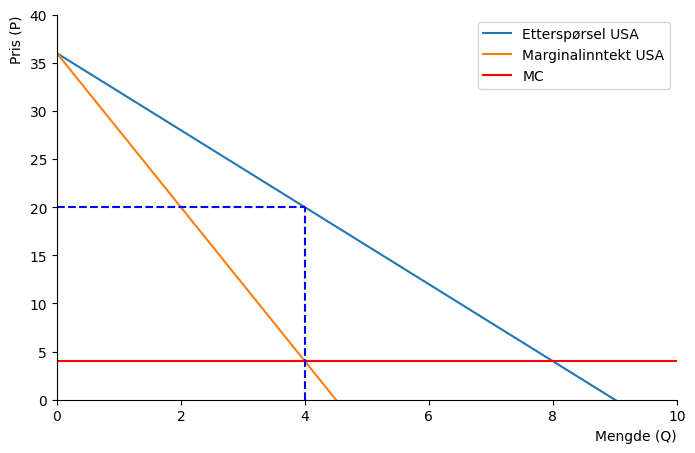

In [92]:
# Invers etterspørsel funksjon
def invers(a,b,Q):
    return a - (b*Q)
# Marginalinntekt funksjon
def MR(a,b,Q):
    return a - (2*b*Q)

Q = np.linspace(0, 40, 100)
#funksjon for å skape akse
def create_ax():
                fig, ax = plt.subplots(figsize=(8, 5))
                ax.set_ylabel('Pris (P)', loc='top', rotation=90)
                ax.set_xlabel('Mengde (Q)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                return fig, ax
            
fig, ax = create_ax()

# Plotter etterspørselskurven for USA
ax.plot(Q, invers(36,4,Q), label='Etterspørsel USA')
# Plotter marginalinntekten for USA
ax.plot(Q, MR(36,4,Q), label='Marginalinntekt USA')
# Plotter MC
ax.axhline(y=4, color='r', label='MC')

# Plotter likevektskvantumet
ax.vlines(x=likevekt_U_kv, ymin=0, ymax=likevekt_U_pris, color='b', linestyle='--')
# Plotter likevektsprisen
ax.hlines(y=likevekt_U_pris, xmin=0, xmax=likevekt_U_kv, color='b', linestyle='--')

ax.set(xlim=(0, 10))
ax.set(ylim=(0, 40))

ax.legend();


### Optimal tilpasning ved tredje grads prisdiskriminering Europa

For Europa har vi allerede regnet ut invers etterspørsel:

$$
P_E = 24 - 4Q_E
$$

Marginalkostnaden er lik i begge markedene, så her har Europa også marginalkostnad $MC = 4$.

For å finne marginalinntekt til Europa, multipliserer vi invers etterspørsel $P_E(Q_E)$ med $Q_E$ og deriverer med hensyn til $Q_E$:

$$
MR_E = 24 - 8Q_E
$$

In [93]:
# Multipliserer prisen med kvantumet for å finne totalinntekten for Europa
TR_E = invers_E*Q_E
TR_E

Q_E*(24 - 4*Q_E)

In [94]:
# Deriverer totalinntekten med hensyn på kvantumet for å finne marginalinntekten
MR_E = TR_E.diff(Q_E)
MR_E

24 - 8*Q_E

Nå har vi regnet ut marginalkostnaden og marginalinntekten for Europa. For å finne optimal tilpasning for monopolisten i Europa, må vi sette $MC_E = MR_E$:

$$
24 - 8Q_E = 4
$$

Vi løser for $Q_E$:

$$
Q_E = 2
$$

Nå kan vi finne prisen monopolisten setter i Europa ved å sette $Q_E = 2$ inn i invers etterspørsel $P_E(Q_E)$:

$$
P_E = 24 - 4 \cdot 2 = 16
$$

Profitten til monopolisten i Europa er gitt ved:

$$
\pi_E = P_E \cdot Q_E - MC \cdot Q_E = 16 \cdot 2 - 4 \cdot 2 = 24
$$

In [95]:
# Løser for kvantumet til Europa
likevekt_E_kv = sp.solve(sp.Eq(MR_E, MC), Q_E)[0]

# Setter kvantumet inn i etterspørselsfunksjonen for å finne prisen
likevekt_E_pris = invers_E.subs(Q_E, likevekt_E_kv)

# Finner profitten
profitt_E = TR_E.subs(Q_E, likevekt_E_kv) - MC*likevekt_E_kv

f'Likevektskvantumet er {round(likevekt_E_kv, 1)}, prisen er {likevekt_E_pris} og profitten blir {profitt_E}'

'Likevektskvantumet er 2.5, prisen er 14 og profitten blir 25'

## Visualisering av pris og mengde i Europa

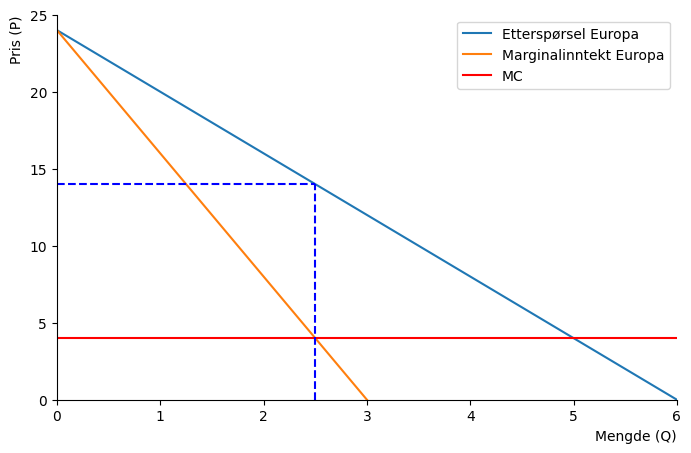

In [ ]:
fig, ax = create_ax()

# Plotter etterspørselskurven for Europa
ax.plot(Q, invers(24,4,Q), label='Etterspørsel Europa')
# Plotter marginalinntekten for Europa
ax.plot(Q, MR(24,4,Q), label='Marginalinntekt Europa')
# Plotter MC
ax.axhline(y=4, color='r', label='MC')

# Plotter likevektskvantumet
ax.vlines(x=likevekt_E_kv, ymin=0, ymax=likevekt_E_pris, color='b', linestyle='--')
# Plotter likevektsprisen
ax.hlines(y=likevekt_E_pris, xmin=0, xmax=likevekt_E_kv, color='b', linestyle='--')

ax.set(xlim=(0, 6))
ax.set(ylim=(0, 25))

ax.legend();

## Optimal tilpasning ved uniform prising

Til slutt ser vi på hvilken pris produsentene vil sette hvis de skal ha lik pris i begge markedene.

For å finne optimal tilpasning ved uniform prising må vi aggregere etterspørselen fra USA og Europa. Total etterspørsel er gitt ved:

$$
Q = Q_U + Q_E = 9 - \frac{P}{4} + 6 - \frac{P}{4} = 15 - \frac{P}{2}
$$

Vi kan finne total invers etterspørsel ved å løse den aggregerte etterspørsel for USA og Europa for P:

$$
P = 30 - 2Q
$$

In [ ]:
# I koden når vi aggregerer etterpørselen, så legger vi sammen kvantumet fra USA og Europa. Derfor bruker vi nå Q OG E istedenfor Q U og Q E.
Q,E,P = sp.symbols('Q E P', real=True, positive=True)
Etterspørsel_USA = sp.Eq(Q,9 - (P/4))
Etterspørsel_EU = sp.Eq(E,6 - (P/4))

# Aggregerer etterpørselen
Etterspørsel_aggregert = Etterspørsel_USA.rhs + Etterspørsel_EU.rhs

Etterspørsel_aggregert

15 - P/2

In [ ]:
# Løser for prisen
invers_aggregert = sp.solve(Etterspørsel_aggregert - Q, P)[0]

invers_aggregert

30 - 2*Q

Marginalkostnader og marginalinntekt for aggregert etterspørsel

Vi antar at marginalkostnaden (MC) fortsatt er konstant, altså MC = 4.

Totalinntekten (TR) for den aggregerte etterspørselen, med invers etterspørsel 
$$
P = 30 - 2Q
$$ 
blir:
$$
TR = P \cdot Q = (30 - 2Q)Q = 30Q - 2Q^2
$$

Marginalinntekten (MR) oppnås ved å derivere totalinntekten med hensyn på Q:
$$
MR = \frac{\partial (TR)}{\partial Q} = 30 - 4Q
$$


In [ ]:
# Multipliserer prisen med kvantumet for å finne totalinntekten
TR = invers_aggregert*Q
TR

Q*(30 - 2*Q)

In [ ]:
# Deriverer totalinntekten med hensyn på kvantumet for å finne marginalinntekten
MR = TR.diff(Q)
MR

30 - 4*Q

Disse uttrykkene setter vi opp mot marginalkostnaden for å finne den optimale mengden som tidligere.

For uniform prising (aggregert etterspørsel) setter vi marginalkostnaden lik marginalinntekten og får:

$$
30 - 4Q = 4
$$

Vi løser for $Q$:
$$
4Q = 30 – 4 = 26
$$

$$
Q = \frac{26}{4} = 6.5
$$

Nå kan vi finne prisen monopolisten setter ved uniform prising ved å sette $Q = 6.5$ inn i invers etterspørsel $P = 30 - 2Q$:

$$
P = 30 - 2 \cdot 6.5 = 17
$$

Profitten til monopolisten ved uniform prising er gitt ved:

$$
\pi = P \cdot Q - MC \cdot Q = 17 \cdot 6.5 - 4 \cdot 6.5 = 84.5
$$

In [ ]:
# Setter MR = MC for å finne likevektskvantumet
likevekt = sp.Eq(MR, MC)

display(likevekt)

Eq(30 - 4*Q, 4)

In [ ]:
# Løser for kvantumet
likevekt_kv = sp.solve(likevekt, Q)[0]

# Setter kvantumet inn i etterspørselsfunksjonen for å finne prisen
likevekt_pris = invers_aggregert.subs(Q, likevekt_kv)

# Finner profitten
profitt = TR.subs(Q, likevekt_kv) - MC*likevekt_kv

f'Likevektskvantumet er {round(likevekt_kv,1)}, prisen er {likevekt_pris} og profitten blir {round(profitt,1)}'

'Likevektskvantumet er 6.5, prisen er 17 og profitten blir 84.5'

In [ ]:
# Total profitt
total_profitt = profitt_U + profitt_E

# Total profitt ved aggregering
profitt

# Endring i profitt
endring_profitt = total_profitt - profitt

print(f'Profitten ved å holde markedene adskilt er {profitt_U + profitt_E}, mens profitten ved å aggregerer markedene er {round(profitt,1)} og endringen i profitt er {round(endring_profitt,1)}')

Profitten ved å holde markedene adskilt er 89, mens profitten ved å aggregerer markedene er 84.5 og endringen i profitt er 4.5


## Visualisering av pris og mengde ved uniform prising

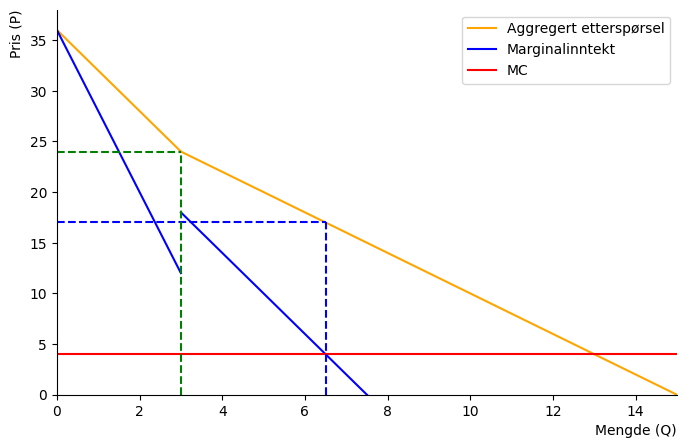

In [131]:
# Visualisering av USA vs aggregering

# Lager etterspørsel for P < 24
Q_1 = np.linspace(0, 3, 100)
# Lager etterspørsel for P > 24
Q_2 = np.linspace(3, 15, 100)

fig, ax = create_ax()

# Plotter etterspørselskurven for USA
ax.plot(Q_1, invers(36,4,Q_1), color= 'orange')
# Plotter aggregert etterspørsel
ax.plot(Q_2, invers(30,2,Q_2), label='Aggregert etterspørsel', color= 'orange')

# Plotter marginalinntekten for USA
ax.plot(Q_1, MR(36,4,Q_1), color= 'blue')
# Plotter marginalinntekten for aggregert etterspørsel
ax.plot(Q_2, MR(30,2,Q_2), label='Marginalinntekt', color= 'blue')


# Plotter MC
ax.axhline(y=4, color='r', label='MC')

# Plotter likevektskvantumet
ax.vlines(x=likevekt_kv, ymin=0, ymax=likevekt_pris, color='b', linestyle='--')
# Plotter likevektsprisen
ax.hlines(y=likevekt_pris, xmin=0, xmax=likevekt_kv, color='b', linestyle='--')

# Plotter likevekt for P < 24
ax.vlines(x=3, ymin=0, ymax=24, color='g', linestyle='--')
# Plotter likevekt for P > 24
ax.hlines(y=24, xmin=0, xmax=3, color='g', linestyle='--')

ax.set(xlim=(0, 15))
ax.set(ylim=(0, 38))

ax.legend();

## Hvorfor prisdiskriminering gir høyere profitt

Prisdiskriminering gir høyere profitt fordi det tillater selgeren å fange opp mer av konsumentoverskuddet ved å tilpasse prisen til betalingsvilligheten i hvert marked. 

Dette fører til at selgeren kan selge flere enheter til høyere priser i markeder med høy betalingsvillighet og fortsatt selge i markeder med lavere betalingsvillighet uten å måtte senke prisen for alle kunder.

I dette tilfellet ser vi at profitten ved prisdiskriminering er høyere enn ved uniform prising. Profitten ved prisdiskriminering er 96, mens profitten ved uniform prising er 84.5.

En annen ting å legge merke til er at prisen i Europa er lavere enn prisen i USA. Dette er fordi etterspørselen i Europa er lavere enn i USA, og monopolisten må sette en lavere pris for å selge flere enheter i Europa.

In [ ]:
print(f'Ved prisdiskriminering vil prisen i USA gå opp fra {likevekt_U_pris} til {likevekt_pris} og prisen i Europa vil gå ned fra {likevekt_E_pris} til {likevekt_pris}')

Ved prisdiskriminering vil prisen i USA gå opp fra 20 til 17 og prisen i Europa vil gå ned fra 14 til 17
